# 💻 Installation of libraries and import
# 💻 Mount Google Drive



In [ ]:
from google.colab import output

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install pycaret
!pip install pyspatialml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.3 MB/s e

In [ ]:
import numpy as np
import pandas as pd
import sklearn.linear_model as ll
import matplotlib.pyplot as plt
import seaborn as sns
from osgeo import gdal
from pyspatialml import Raster
from copy import deepcopy
import os
import tempfile
import geopandas as gpd
import rasterio.plot
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio import merge
from rasterio.plot import show
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable
from matplotlib.pyplot import figure

In [ ]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.1.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🚀 Quick start

## Last updated 15/11/2023
### **Victória Vasconcelos Freitas**

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, biomass distibution
etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**  

### I'm adding this steps:
### ➡️**Setup**
### ➡️ **Open rasterlayer and extract pixel values from field samples**
### ➡️ **Compare Models for ~9000 possibilities (session IDs)**
### ➡️ **Follow workflow from PyCaret for the best model**
### ➡️ **Use Pipeline from PyCaret to predict in raster using Pyspatialml**
<br/>

In [ ]:
### load my data using geopandas for the vector with biomass samples
# cafe1 = gpd.read_file('/content/drive/MyDrive/buffer1m_embrapa.gpkg')
cafe1 = gpd.read_file('/content/drive/MyDrive/gee_biomassa/cafe_ref_biomassa_cor2.gpkg')
cafe1.head(2)


,id,d_inf,altura_t,biomassa,geometry
0,31,"2,01","3,05",2.498409622,POINT (256129.871 7905459.387)
1,32,"2,25","3,15",2.512308251,POINT (256269.638 7905552.876)


In [ ]:
### load my UAV image stacked with n bands
stack = Raster(['/content/drive/MyDrive/gee_biomassa/gee_biomassa_mosaic_nodata_rename.tif'])

In [ ]:
stack.names = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'ndvi', 'ndviB', 'savi', 'vari', 'EXG', 'TGI', 'GLI', 'Rdvi', 'TVDI', 'Osavi', 'EVI', 'ndre', 'gndvi', 'ccci', 'CHM', 'DSM', 'DTM']
stack.names

dict_keys(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'ndvi', 'ndviB', 'savi', 'vari', 'EXG', 'TGI', 'GLI', 'Rdvi', 'TVDI', 'Osavi', 'EVI', 'ndre', 'gndvi', 'ccci', 'CHM', 'DSM', 'DTM'])

In [ ]:
# stack.drop(labels=['b6'], in_place=True)
stack.drop(labels=['b6','ndviB', 'EXG','GLI', 'EVI', 'ccci','DSM','DTM'], in_place=True)

In [ ]:
plt.imshow(,
           extent=rasterio.plot.plotting_extent(,transform=stack.transform),cmap='Spectral')
plt.scatter(x=cafe1.bounds.iloc[:, 0],
            y=cafe1.bounds.iloc[:, 1],
            s=4, color='blue')
plt.colorbar()
plt.title('Amostras de biomassa')
plt.show()

SyntaxError: ignored

In [ ]:
# stop

In [ ]:
### extract the pixel values for all bands using my vector data
df_points = stack.extract_vector(cafe1,progress=True)


100%|█████████▉| 2199/2200 [1:12:41<00:01,  1.98s/it]


In [ ]:
### checking the number of rows
len(df_points.index)

10

In [ ]:
df_points

,,b1,b2,b3,b4,b5,ndvi,savi,vari,TGI,Rdvi,TVDI,Osavi,ndre,gndvi,CHM,geometry
pixel_idx,geometry_idx,,,,,,,,,,,,,,,,
0,0,23622.0,36554.0,23772.0,39158.0,38198.0,0.244494,0.366744,0.348245,2.052587e+13,61.333374,0.589377,0.000012,0.012410,0.034393,3.072632,POINT (256129.871 7905459.387)
1,1,32889.0,47622.0,29639.0,38400.0,43359.0,0.128764,0.193148,0.405278,4.642045e+13,33.587273,0.342223,0.000022,-0.060654,-0.107205,2.653198,POINT (256269.638 7905552.876)
2,2,18102.0,20766.0,14754.0,28879.0,21477.0,0.323723,0.485590,0.345160,5.545786e+12,67.620895,0.733658,0.000009,0.146993,0.163420,2.727295,POINT (256183.600 7905647.375)
3,3,15847.0,28204.0,11054.0,44168.0,32761.0,0.599652,0.899487,0.732562,4.940231e+12,140.914459,1.124589,0.000009,0.148280,0.220583,3.020752,POINT (255965.665 7905608.466)
4,4,14664.0,17804.0,14369.0,27807.0,21753.0,0.318617,0.477931,0.196185,3.751186e+12,65.433769,0.724883,0.000009,0.122155,0.219311,2.678955,POINT (256379.820 7905559.426)
5,5,22066.0,23762.0,15223.0,34328.0,26959.0,0.385562,0.578349,0.504699,7.981460e+12,85.826385,0.834809,0.000010,0.120238,0.181890,2.920044,POINT (256226.614 7905746.413)
6,6,28138.0,45196.0,20776.0,51517.0,47228.0,0.425228,0.637846,0.645451,2.642036e+13,114.332542,0.895070,0.000010,0.043435,0.065358,2.987671,POINT (256112.733 7905562.474)
7,7,27849.0,26486.0,23244.0,24096.0,24875.0,0.017997,0.026996,0.148165,1.714427e+13,3.915845,0.053037,0.000042,-0.015907,-0.047250,3.238281,POINT (256192.825 7905507.302)
8,8,26916.0,43520.0,19780.0,50068.0,46219.0,0.433627,0.650446,0.652485,2.316906e+13,114.602371,0.907402,0.000010,0.039974,0.069966,3.586792,POINT (256290.491 7905622.893)


In [ ]:
### adding my Y to predict, in this case only biomass. PyCaret needs X and y in the same dataset
df_points.index = df_points.index.get_level_values("geometry_idx")
df_points = df_points.merge(
    cafe1.loc[:, ("biomassa")],
    left_index=True,
    right_index=True
)

In [ ]:
df_points

,b1,b2,b3,b4,b5,ndvi,savi,vari,TGI,Rdvi,TVDI,Osavi,ndre,gndvi,CHM,geometry,biomassa
geometry_idx,,,,,,,,,,,,,,,,,
0,23622.0,36554.0,23772.0,39158.0,38198.0,0.244494,0.366744,0.348245,2.052587e+13,61.333374,0.589377,0.000012,0.012410,0.034393,3.072632,POINT (256129.871 7905459.387),2.498409622
1,32889.0,47622.0,29639.0,38400.0,43359.0,0.128764,0.193148,0.405278,4.642045e+13,33.587273,0.342223,0.000022,-0.060654,-0.107205,2.653198,POINT (256269.638 7905552.876),2.512308251
2,18102.0,20766.0,14754.0,28879.0,21477.0,0.323723,0.485590,0.345160,5.545786e+12,67.620895,0.733658,0.000009,0.146993,0.163420,2.727295,POINT (256183.600 7905647.375),2.445897036
3,15847.0,28204.0,11054.0,44168.0,32761.0,0.599652,0.899487,0.732562,4.940231e+12,140.914459,1.124589,0.000009,0.148280,0.220583,3.020752,POINT (255965.665 7905608.466),2.476682996
4,14664.0,17804.0,14369.0,27807.0,21753.0,0.318617,0.477931,0.196185,3.751186e+12,65.433769,0.724883,0.000009,0.122155,0.219311,2.678955,POINT (256379.820 7905559.426),2.491288466
5,22066.0,23762.0,15223.0,34328.0,26959.0,0.385562,0.578349,0.504699,7.981460e+12,85.826385,0.834809,0.000010,0.120238,0.181890,2.920044,POINT (256226.614 7905746.413),2.491288466
6,28138.0,45196.0,20776.0,51517.0,47228.0,0.425228,0.637846,0.645451,2.642036e+13,114.332542,0.895070,0.000010,0.043435,0.065358,2.987671,POINT (256112.733 7905562.474),2.476682996
7,27849.0,26486.0,23244.0,24096.0,24875.0,0.017997,0.026996,0.148165,1.714427e+13,3.915845,0.053037,0.000042,-0.015907,-0.047250,3.238281,POINT (256192.825 7905507.302),2.51909296
8,26916.0,43520.0,19780.0,50068.0,46219.0,0.433627,0.650446,0.652485,2.316906e+13,114.602371,0.907402,0.000010,0.039974,0.069966,3.586792,POINT (256290.491 7905622.893),2.545211267


In [ ]:
### Pearson's correlation
corr = df_points.corr(method='pearson', numeric_only=True)


In [ ]:
### normalized correlation and nan correlation
corr_nan = corr.replace(1,np.nan)

corr_norm = corr_nan/corr_nan.max(axis=0)

corr_norm = (corr_nan - corr_nan.min(axis=0)) / (corr_nan.max(axis=0) - corr_nan.min(axis=0))

In [ ]:
corr_03_n = corr_norm[(corr_norm >= -0.4) & (corr_norm <= 0.4)]
corr_3_5_n = corr_norm[((corr_norm  >= -0.5)&(corr_norm < -0.4)) | ((corr_norm > 0.4 )&(corr_norm  <= 0.5))]
corr_5_1_n = corr_norm[((corr_norm  >= -2)&(corr_norm < -0.5)) | ((corr_norm > 0.5)&(corr_norm  <= 2))]

In [ ]:
corr_03 = corr[(corr >= -0.3) & (corr <= 0.3)]
corr_3_5 = corr[((corr  >= -0.5)&(corr < -0.3)) | ((corr > 0.3 )&(corr  <= 0.5))]
corr_5_1 = corr[((corr  >= -1)&(corr < -0.5)) | ((corr > 0.5)&(corr  <= 1))]

In [ ]:
cmap = (ListedColormap(['red', 'orange','green', 'orange', 'red']))

bounds = [-1.0, -0.5, -0.4, 0.4, 0.5, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

Text(0.5, 1.0, 'matriz de correlação entre variáveis do VANT e biomassa - café 1')

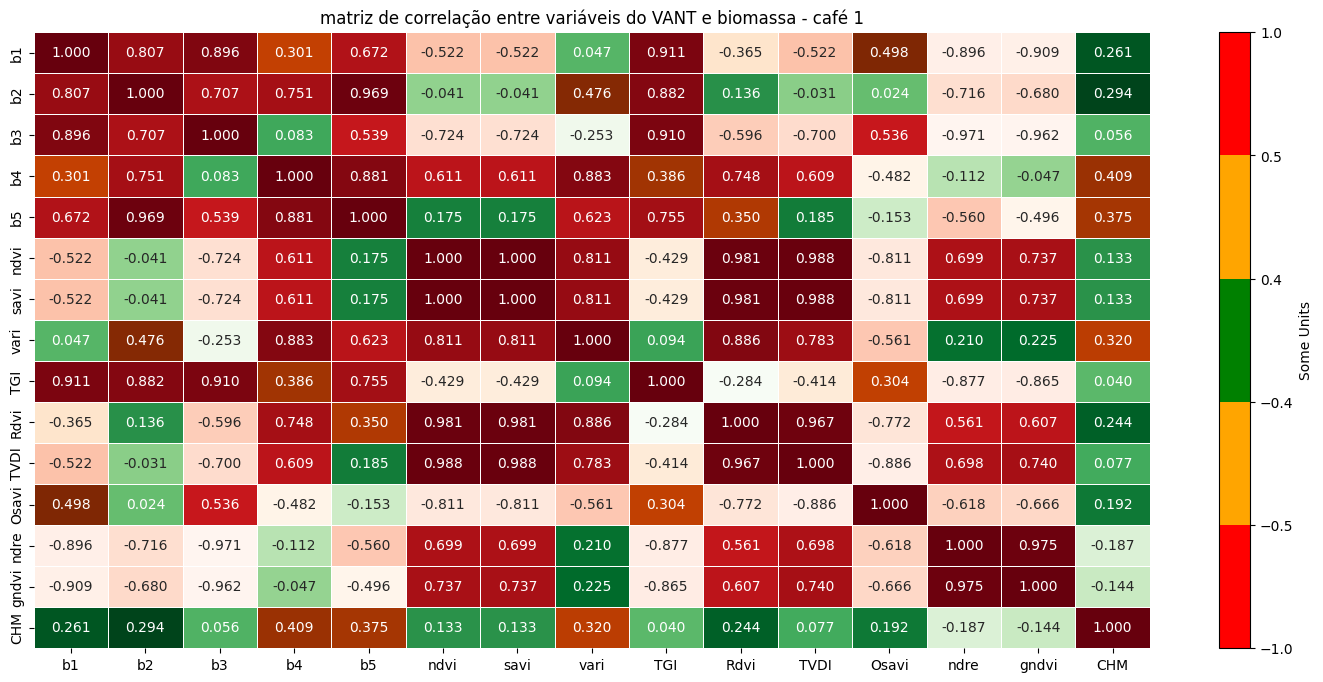

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))         # Sample figsize in inches NaN correlation


sns.heatmap(corr_03, annot=True, linewidths=.5, ax=ax, cmap = 'Greens' ,cbar=False, fmt='.3f')
sns.heatmap(corr_3_5, annot=True, linewidths=.5, ax=ax, cmap = 'Oranges' ,cbar=False, fmt='.3f')
sns.heatmap(corr_5_1, annot=True, linewidths=.5, ax=ax, cmap = 'Reds' ,cbar=False, fmt='.3f')

plt.colorbar(ScalarMappable(norm=norm, cmap=cmap)
             , label='Some Units')

plt.title('matriz de correlação entre variáveis do VANT e biomassa - café 1')

# sns.heatmap(corr, annot=True)
# plt.show()

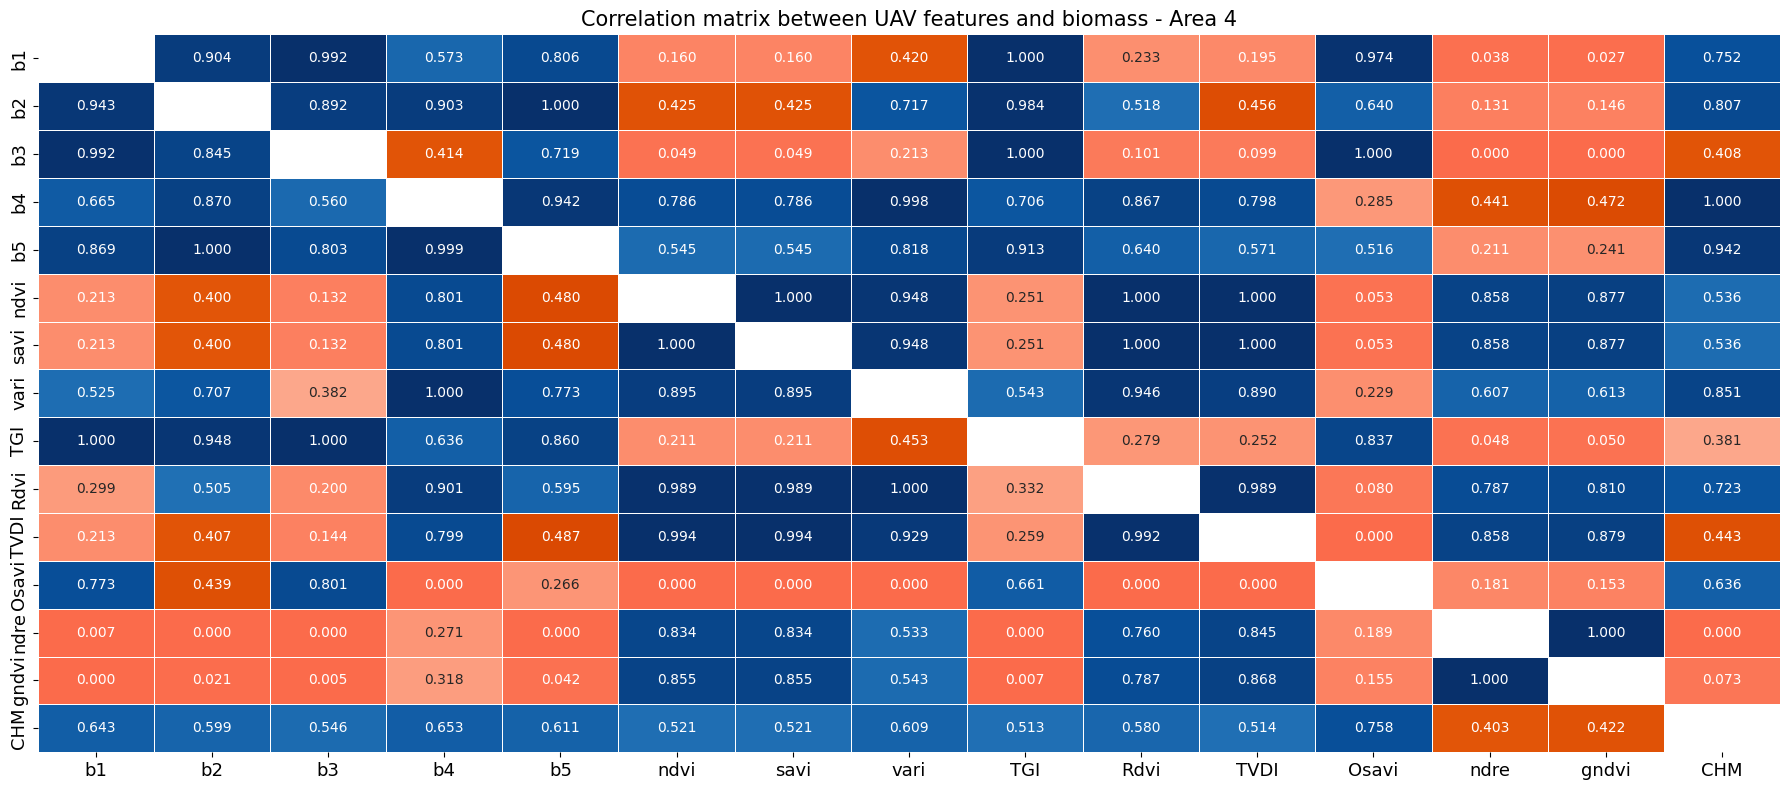

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))         # Sample figsize in inches Normalized correlation


sns.heatmap(corr_03_n, annot=True, linewidths=.5, ax=ax, cmap = 'Reds_r',vmin=-1,vmax=1 ,cbar=False, fmt='.3f')
sns.heatmap(corr_3_5_n, annot=True, linewidths=.5, ax=ax, cmap = 'Oranges',vmin=-1,vmax=1 ,cbar=False, fmt='.3f')
sns.heatmap(corr_5_1_n, annot=True, linewidths=.5, ax=ax, cmap = 'Blues',vmin=-1,vmax=1 ,cbar=False, fmt='.3f')

# plt.colorbar(ScalarMappable(norm=norm, cmap=cmap)
            #  , label='Some Units')

plt.title('Correlation matrix between UAV features and biomass - Area 4', fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.tight_layout()
# sns.heatmap(corr, annot=True)
# plt.savefig('/content/drive/MyDrive/gee_biomassa/Correlation matrix area 4.png', dpi=300)
# plt.show()

# After normalizing the correlation, we removed the bands with low values (in green) and retained those moderately/strongly correlated with Biomass (orange/red).

In [ ]:
k

NameError: ignored

In [ ]:
# ### removing poorly correlated values
stack.drop(labels=['ndviB', 'EXG','GLI', 'EVI', 'ccci','DSM','DTM'], in_place=True)
stack.names

dict_keys(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'ndvi', 'savi', 'vari', 'TGI', 'Rdvi', 'TVDI', 'Osavi', 'ndre', 'gndvi', 'CHM'])

In [ ]:
### extracting only the bands of interest
# df_points2 = stack.extract_vector(cafe1,progress=True)

In [ ]:
# df_points2

In [ ]:
# ### defining my Y to predict and extracting values only in selected bands
# df_points2.index = df_points2.index.get_level_values("geometry_idx")
# df_points2 = df_points2.merge(
#     cafe1.loc[:, ("biomassa")],
#     left_index=True,
#     right_index=True
# )

In [ ]:
len(df_points2)

NameError: ignored

In [ ]:
# removing the geometry column to execute the regression
df_points2 = df_points



In [ ]:
df_points2 = df_points2.drop('geometry',axis=1)

In [ ]:
df_points2

,b1,b2,b3,b4,b5,ndvi,savi,vari,TGI,Rdvi,TVDI,Osavi,ndre,gndvi,CHM,biomassa
geometry_idx,,,,,,,,,,,,,,,,
0,23622.0,36554.0,23772.0,39158.0,38198.0,0.244494,0.366744,0.348245,2.052587e+13,61.333374,0.589377,0.000012,0.012410,0.034393,3.072632,2.498409622
1,32889.0,47622.0,29639.0,38400.0,43359.0,0.128764,0.193148,0.405278,4.642045e+13,33.587273,0.342223,0.000022,-0.060654,-0.107205,2.653198,2.512308251
2,18102.0,20766.0,14754.0,28879.0,21477.0,0.323723,0.485590,0.345160,5.545786e+12,67.620895,0.733658,0.000009,0.146993,0.163420,2.727295,2.445897036
3,15847.0,28204.0,11054.0,44168.0,32761.0,0.599652,0.899487,0.732562,4.940231e+12,140.914459,1.124589,0.000009,0.148280,0.220583,3.020752,2.476682996
4,14664.0,17804.0,14369.0,27807.0,21753.0,0.318617,0.477931,0.196185,3.751186e+12,65.433769,0.724883,0.000009,0.122155,0.219311,2.678955,2.491288466
5,22066.0,23762.0,15223.0,34328.0,26959.0,0.385562,0.578349,0.504699,7.981460e+12,85.826385,0.834809,0.000010,0.120238,0.181890,2.920044,2.491288466
6,28138.0,45196.0,20776.0,51517.0,47228.0,0.425228,0.637846,0.645451,2.642036e+13,114.332542,0.895070,0.000010,0.043435,0.065358,2.987671,2.476682996
7,27849.0,26486.0,23244.0,24096.0,24875.0,0.017997,0.026996,0.148165,1.714427e+13,3.915845,0.053037,0.000042,-0.015907,-0.047250,3.238281,2.51909296
8,26916.0,43520.0,19780.0,50068.0,46219.0,0.433627,0.650446,0.652485,2.316906e+13,114.602371,0.907402,0.000010,0.039974,0.069966,3.586792,2.545211267


In [ ]:
df_points2['biomassa'] = df_points2['biomassa'].astype(float)

In [ ]:
df_points2.to_csv('/content/drive/MyDrive/gee_biomassa/pontos_caferef.csv')


In [ ]:
df_points2 = pd.read_csv('/content/drive/MyDrive/gee_biomassa/pontos_caferef.csv')
df_points2 = df_points2.drop('geometry_idx', axis=1)
df_points2

,b1,b2,b3,b4,b5,ndvi,savi,vari,TGI,Rdvi,TVDI,Osavi,ndre,gndvi,CHM,biomassa
0,23622.0,36554.0,23772.0,39158.0,38198.0,0.244494,0.366744,0.348245,2.052587e+13,61.333374,0.589377,0.000012,0.012410,0.034393,3.072632,2.498410
1,32889.0,47622.0,29639.0,38400.0,43359.0,0.128764,0.193148,0.405278,4.642045e+13,33.587273,0.342223,0.000022,-0.060654,-0.107205,2.653198,2.512308
2,18102.0,20766.0,14754.0,28879.0,21477.0,0.323723,0.485590,0.345160,5.545786e+12,67.620895,0.733658,0.000009,0.146993,0.163420,2.727295,2.445897
3,15847.0,28204.0,11054.0,44168.0,32761.0,0.599652,0.899487,0.732562,4.940231e+12,140.914459,1.124589,0.000009,0.148280,0.220583,3.020752,2.476683
4,14664.0,17804.0,14369.0,27807.0,21753.0,0.318617,0.477931,0.196185,3.751186e+12,65.433769,0.724883,0.000009,0.122155,0.219311,2.678955,2.491288
5,22066.0,23762.0,15223.0,34328.0,26959.0,0.385562,0.578349,0.504699,7.981460e+12,85.826385,0.834809,0.000010,0.120238,0.181890,2.920044,2.491288
6,28138.0,45196.0,20776.0,51517.0,47228.0,0.425228,0.637846,0.645451,2.642036e+13,114.332542,0.895070,0.000010,0.043435,0.065358,2.987671,2.476683
7,27849.0,26486.0,23244.0,24096.0,24875.0,0.017997,0.026996,0.148165,1.714427e+13,3.915845,0.053037,0.000042,-0.015907,-0.047250,3.238281,2.519093
8,26916.0,43520.0,19780.0,50068.0,46219.0,0.433627,0.650446,0.652485,2.316906e+13,114.602371,0.907402,0.000010,0.039974,0.069966,3.586792,2.545211
9,24693.0,37799.0,20747.0,39280.0,37809.0,0.308744,0.463120,0.503707,1.936387e+13,75.643639,0.707722,0.000013,0.019082,0.019214,2.906372,2.476683


In [ ]:
from pycaret.regression import *

for n in range(502,9001,500):
  file_name = f'{n}_{n+500}'
  rows = []
  for session_id in range(n,n+500):
    t = setup(data =df_points2, target = 'biomassa', train_size=0.7, normalize=True,fold=4, session_id=session_id)
    # compare baseline models
    best2 = t.compare_models(fold=2)

    best_p = pull()
    r2 = best_p.iloc[0]['R2']
    rows.append({'session_id':session_id,'r2':r2})
    output.clear()
  df = pd.DataFrame(rows).to_csv(f"/content/drive/MyDrive/gee_biomassa/{file_name}caferef.csv")

,Description,Value
0,Session id,2855
1,Target,biomassa
2,Target type,Regression
3,Original data shape,"(10, 17)"
4,Transformed data shape,"(10, 17)"
5,Transformed train set shape,"(7, 17)"
6,Transformed test set shape,"(3, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:24:23
Status,. . . . . . . . . . . . . . . . . .,Fitting 2 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0379,0.0019,0.0432,-1.6896,0.0124,0.0151,0.0350


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best_p

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0197,8.000000e-04,0.0258,-4.696000e-01,0.0073,0.0078,0.130
gbr,Gradient Boosting Regressor,0.0211,8.000000e-04,0.0262,-5.550000e-01,0.0075,0.0084,0.065
ada,AdaBoost Regressor,0.0231,7.000000e-04,0.0256,-5.790000e-01,0.0073,0.0092,0.035
en,Elastic Net,0.0207,7.000000e-04,0.0253,-7.149000e-01,0.0072,0.0082,0.055
lasso,Lasso Regression,0.0207,7.000000e-04,0.0253,-7.149000e-01,0.0072,0.0082,0.060
dummy,Dummy Regressor,0.0207,7.000000e-04,0.0253,-7.149000e-01,0.0072,0.0082,0.035
lightgbm,Light Gradient Boosting Machine,0.0207,7.000000e-04,0.0253,-7.149000e-01,0.0072,0.0082,0.055
llar,Lasso Least Angle Regression,0.0207,7.000000e-04,0.0253,-7.149000e-01,0.0072,0.0082,0.030
dt,Decision Tree Regressor,0.0256,1.000000e-03,0.0294,-9.436000e-01,0.0084,0.0102,0.040
rf,Random Forest Regressor,0.0218,8.000000e-04,0.0272,-1.013800e+00,0.0078,0.0087,0.180


In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
t = setup(data =df_points2, target = 'biomassa', train_size=0.7, normalize=True,fold=4, session_id=325)

,Description,Value
0,Session id,325
1,Target,biomassa
2,Target type,Regression
3,Original data shape,"(10, 16)"
4,Transformed data shape,"(10, 16)"
5,Transformed train set shape,"(7, 16)"
6,Transformed test set shape,"(3, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best2 = t.compare_models(fold=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0108,0.0002,0.0129,0.2970,0.0037,0.0043,0.2600
ridge,Ridge Regression,0.0138,0.0002,0.0148,0.1432,0.0042,0.0056,0.0400
rf,Random Forest Regressor,0.0130,0.0002,0.0153,0.0852,0.0044,0.0052,0.3400
gbr,Gradient Boosting Regressor,0.0127,0.0003,0.0160,-0.0373,0.0046,0.0051,0.1100
en,Elastic Net,0.0148,0.0003,0.0173,-0.1648,0.0050,0.0059,0.0350
lasso,Lasso Regression,0.0148,0.0003,0.0173,-0.1648,0.0050,0.0059,0.0300
dummy,Dummy Regressor,0.0148,0.0003,0.0173,-0.1648,0.0050,0.0059,0.0450
lightgbm,Light Gradient Boosting Machine,0.0148,0.0003,0.0173,-0.1648,0.0050,0.0059,0.3400
llar,Lasso Least Angle Regression,0.0148,0.0003,0.0173,-0.1648,0.0050,0.0059,0.0300
xgboost,Extreme Gradient Boosting,0.0141,0.0004,0.0183,-0.5480,0.0052,0.0056,0.0800


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. In this case, the best session id selected.
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# compare baseline models
best = s.compare_models(fold=2)
best_pu = pull()

In [ ]:
# create the best models from compare phase

xboost = t.create_model('xgboost', fold=2)
tuned_xboost = tune_model(xboost, optimize='RMSE', fold=3)

In [ ]:
# create the best models from compare phase

et = t.create_model('et', fold=2)
tuned_et = tune_model(et, optimize='MAE', fold=2)

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [ ]:
# this shows the information of bands used, the distribution of samples and more
get_config('y_test')

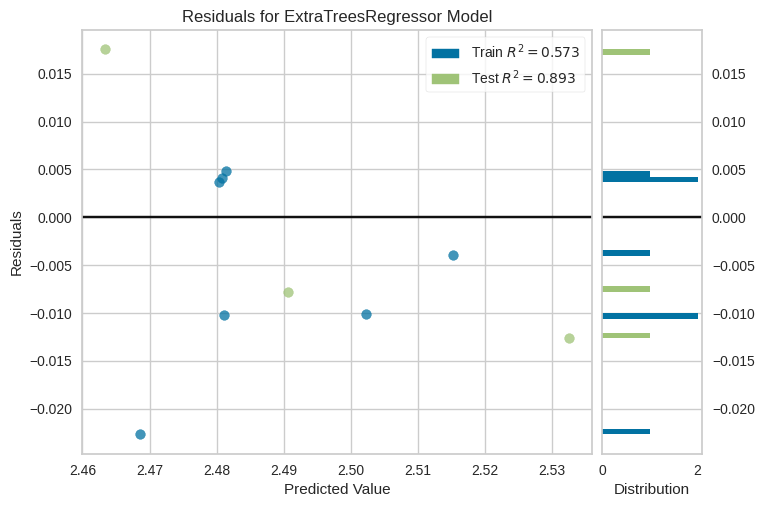

In [ ]:
# plot residuals
plot_model(et, plot = 'residuals')

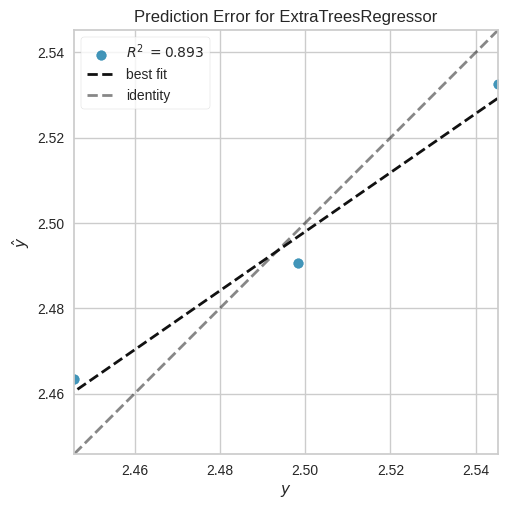

In [ ]:
# plot error
plot_model(et, plot = 'error')

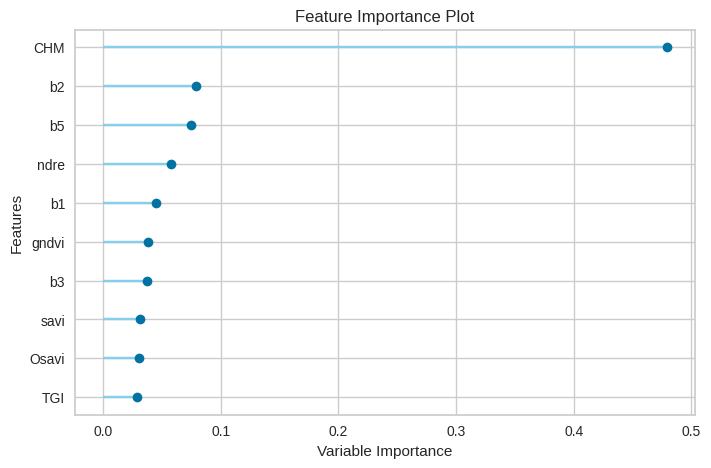

In [ ]:
# plot feature importance
plot_model(et, plot = 'feature')

In [ ]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [ ]:
evaluate_model(et)

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0185,0.0004,0.0188,-1.5405,0.0054,0.0074


In [ ]:
# show predictions df
holdout_pred.head()

,b1,b2,b3,b4,b5,ndvi,savi,vari,TGI,Rdvi,TVDI,Osavi,ndre,gndvi,CHM,biomassa,prediction_label
0,23622.0,36554.0,23772.0,39158.0,38198.0,0.244494,0.366744,0.348245,2.052587e+13,61.333374,0.589377,0.000012,0.012410,0.034393,3.072632,2.498410,2.483879
5,22066.0,23762.0,15223.0,34328.0,26959.0,0.385562,0.578349,0.504699,7.981460e+12,85.826385,0.834809,0.000010,0.120238,0.181890,2.920044,2.491288,2.468860
7,27849.0,26486.0,23244.0,24096.0,24875.0,0.017997,0.026996,0.148165,1.714427e+13,3.915845,0.053037,0.000042,-0.015907,-0.047250,3.238281,2.519093,2.500498


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop charges

new_data = df_points2.copy()
new_data.drop('biomassa', axis=1, inplace=True)
new_data.head()

,b1,b2,b3,b4,b5,ndvi,savi,vari,TGI,Rdvi,TVDI,Osavi,ndre,gndvi,CHM
0,23622.0,36554.0,23772.0,39158.0,38198.0,0.244494,0.366744,0.348245,2.052587e+13,61.333374,0.589377,0.000012,0.012410,0.034393,3.072632
1,32889.0,47622.0,29639.0,38400.0,43359.0,0.128764,0.193148,0.405278,4.642045e+13,33.587273,0.342223,0.000022,-0.060654,-0.107205,2.653198
2,18102.0,20766.0,14754.0,28879.0,21477.0,0.323723,0.485590,0.345160,5.545786e+12,67.620895,0.733658,0.000009,0.146993,0.163420,2.727295
3,15847.0,28204.0,11054.0,44168.0,32761.0,0.599652,0.899487,0.732562,4.940231e+12,140.914459,1.124589,0.000009,0.148280,0.220583,3.020752
4,14664.0,17804.0,14369.0,27807.0,21753.0,0.318617,0.477931,0.196185,3.751186e+12,65.433769,0.724883,0.000009,0.122155,0.219311,2.678955


In [ ]:
# predict model on new_data
predictions = predict_model(et, data = new_data)
predictions.head()

,b1,b2,b3,b4,b5,ndvi,savi,vari,TGI,Rdvi,TVDI,Osavi,ndre,gndvi,CHM,prediction_label
0,23622.0,36554.0,23772.0,39158.0,38198.0,0.244494,0.366744,0.348245,2.052587e+13,61.333374,0.589377,0.000012,0.012410,0.034393,3.072632,2.483879
1,32889.0,47622.0,29639.0,38400.0,43359.0,0.128764,0.193148,0.405278,4.642045e+13,33.587273,0.342223,0.000022,-0.060654,-0.107205,2.653198,2.512308
2,18102.0,20766.0,14754.0,28879.0,21477.0,0.323723,0.485590,0.345160,5.545786e+12,67.620895,0.733658,0.000009,0.146993,0.163420,2.727295,2.445897
3,15847.0,28204.0,11054.0,44168.0,32761.0,0.599652,0.899487,0.732562,4.940231e+12,140.914459,1.124589,0.000009,0.148280,0.220583,3.020752,2.476683
4,14664.0,17804.0,14369.0,27807.0,21753.0,0.318617,0.477931,0.196185,3.751186e+12,65.433769,0.724883,0.000009,0.122155,0.219311,2.678955,2.491288


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(et, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['b1', 'b2', 'b3', 'b4', 'b5',
                                              'ndvi', 'savi', 'vari', 'TGI',
                                              'Rdvi', 'TVDI', 'Osavi', 'ndre',
                                              'gndvi', 'CHM'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=98))]),
 'my_first_pipeline.pkl')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['b1', 'b2', 'b3', 'b4', 'b5',
                                             'ndvi', 'savi', 'vari', 'TGI',
                                             'Rdvi', 'TVDI', 'Osavi', 'ndre',
                                             'gndvi', 'CHM'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=98))])

## ⭐ ✨  After the creation of Pipeline we'll use this workflow in the Rasterlayer to save our biomass image

In [ ]:
preds = stack.predict(et)
preds.rename(
    {old: new for old, new in zip(preds.names, ['biomassa'])},
    in_place=True
)


In [ ]:
wwwwwwwwwwwwwww

In [ ]:
clear_y_pred_val = np.where(biomassa_pred < 0,np.nan,biomassa_pred)
clear_y_pred_val

In [ ]:
np.unique(clear_y_pred_val)

In [ ]:
clear_y_pred_val2 = np.where(clear_y_pred_val > 5,np.nan,clear_y_pred_val)
clear_y_pred_val2

NameError: ignored

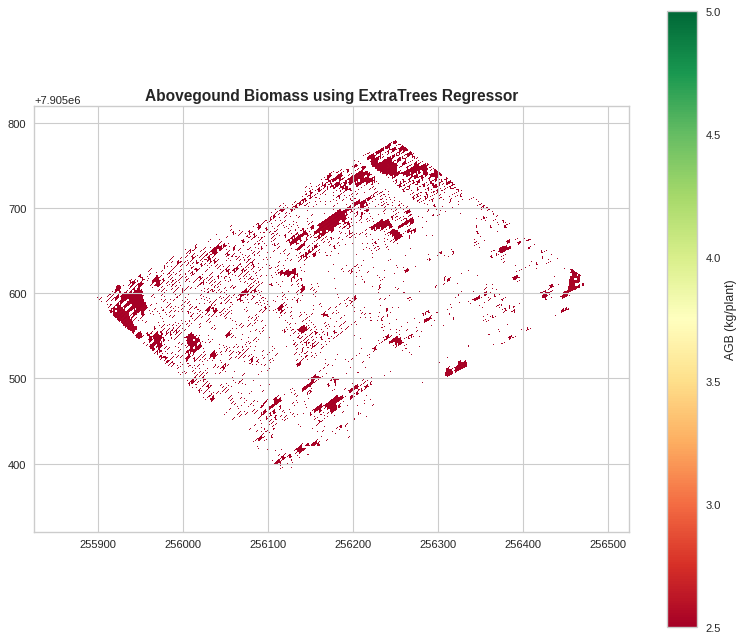

In [ ]:
preds.biomassa.cmap = 'copper'

figure(figsize=(12, 10), dpi=80)
plt.title('Abovegound Biomass using ExtraTrees Regressor', fontsize=14,fontweight='bold')
plt.imshow(preds.biomassa.read(masked=True),
           extent=rasterio.plot.plotting_extent(preds.biomassa),cmap='RdYlGn', vmin=2.5,vmax=5)
plt.colorbar(label='AGB (kg/plant)')


# preds.plot(out_shape=(500, 500), figsize=(10, 8))
plt.scatter(x=cafe1.bounds.iloc[:, 0],
            y=cafe1.bounds.iloc[:, 1],
            s=15, color='blue', marker='*')

cafe1 = df_points2#.rename(columns ={'Name':'samples'})
plt.legend(cafe1,loc='upper right', markerscale=2)

plt.show()

In [ ]:
tmp_tif = '/content/drive/MyDrive/gee_biomassa/agb_caferef_et.tif'
newstack = preds.write(file_path=tmp_tif, nodata=-9999)
newstack.biomassa.read()

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [ ]:
### opening the Raster saved with rasterio
biomassa_pred =  Raster(['/content/drive/MyDrive/gee_biomassa/agb_caferef_et.tif'])

In [ ]:
pts_raster_pred = gpd.read_file('/content/drive/MyDrive/gee_biomassa/cafe_ref_biomassa_cor2.gpkg')

In [ ]:
### extract values from the predicted raster biomass

df_points_pred = biomassa_pred.extract_vector(pts_raster_pred,progress=True)
df_points_pred.head(1)


100%|█████████▉| 2199/2200 [00:06<00:00, 325.09it/s]


,,agb_caferef_et,geometry
pixel_idx,geometry_idx,,
0,0,2.530588,POINT (256129.871 7905459.387)


In [ ]:
y_true = pd.DataFrame(get_config('y'))

In [ ]:
df_points_pred

,,agb_caferef_et,geometry
pixel_idx,geometry_idx,,
0,0,2.530588,POINT (256129.871 7905459.387)
1,1,2.530588,POINT (256269.638 7905552.876)
2,2,2.530588,POINT (256183.600 7905647.375)
3,3,2.531602,POINT (255965.665 7905608.466)
4,4,2.530588,POINT (256379.820 7905559.426)
5,5,2.530588,POINT (256226.614 7905746.413)
6,6,2.530917,POINT (256112.733 7905562.474)
7,7,2.530588,POINT (256192.825 7905507.302)
8,8,2.530917,POINT (256290.491 7905622.893)


In [ ]:
df_points_pred.drop([df_points_pred.index[3],df_points_pred.index[9]] )

,,agb_caferef_et,geometry
pixel_idx,geometry_idx,,
0,0,2.530588,POINT (256129.871 7905459.387)
1,1,2.530588,POINT (256269.638 7905552.876)
2,2,2.530588,POINT (256183.600 7905647.375)
4,4,2.530588,POINT (256379.820 7905559.426)
5,5,2.530588,POINT (256226.614 7905746.413)
6,6,2.530917,POINT (256112.733 7905562.474)
7,7,2.530588,POINT (256192.825 7905507.302)
8,8,2.530917,POINT (256290.491 7905622.893)


In [ ]:
### adding my Y to predict, in this case only biomass. PyCaret needs X and y in the same dataset
df_points_pred.index = df_points_pred.index.get_level_values("geometry_idx")
df_points_pred = df_points_pred.merge(
    y_true.loc[:, ("biomassa")],
    left_index=True,
    right_index=True
)

In [ ]:
df_points_pred = df_points_pred.drop([df_points_pred.index[3],df_points_pred.index[9]] )

In [ ]:
df_points_pred.to_csv('/content/drive/MyDrive/gee_biomassa/validacao_pontos_caferef2.csv')

In [ ]:
df_points_pred = pd.read_csv('/content/drive/MyDrive/gee_biomassa/validacao_pontos_caferef2.csv')

In [ ]:
### remove geometry from the vector data
df_points_pred=df_points_pred.drop('geometry',axis=1)

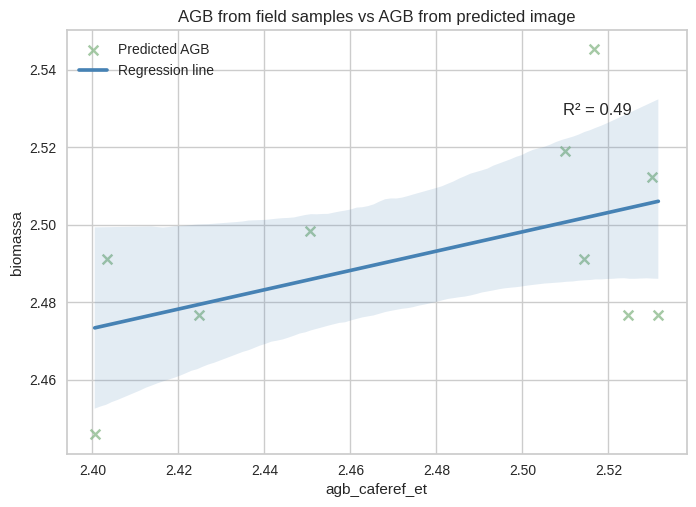

In [ ]:
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Create the regression plot
g = sns.regplot(data=df_points_pred, x="agb_caferef_et", y="biomassa", robust=False, label=True, scatter_kws={"color": "darkseagreen"}, line_kws={"color": "steelblue"}, marker='x')

plt.legend(labels=['Predicted AGB','Regression line'])

# Calculate Pearson correlation coefficient (r)
r, p = sp.pearsonr(df_points_pred['agb_caferef_et'], df_points_pred['biomassa'])

# Annotate the plot with r
ax = plt.gca()
ax.text(.8, .8, 'R² = {:.2f}'.format(r), transform=ax.transAxes)



plt.title('AGB from field samples vs AGB from predicted image')
plt.show()

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['ndvi'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

In [ ]:
get_config('X_train')['ndvi'].hist()

___